# 1. Setting Up

In [1]:
import pandas as pd
import numpy as np
import json
import os
import ast
import nltk
import json

#viz
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [ ]:
!python json_to_csv_converter.py yelp_academic_dataset_business.json

In [2]:
business = pd.read_csv('yelp_academic_dataset_business.csv')

In [3]:
business.head()

,hours.Friday,attributes.RestaurantsAttire,attributes.BikeParking,state,categories,attributes.BusinessParking,attributes.Alcohol,attributes.GoodForDancing,attributes.BYOB,attributes.DietaryRestrictions,...,attributes.HasTV,attributes.HappyHour,hours.Monday,attributes.CoatCheck,attributes.OutdoorSeating,is_open,attributes.AcceptsInsurance,attributes,stars,city
0,11:0-21:0,casual,False,AB,"Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'garage': False, 'street': True, 'validated':...",NaN,NaN,NaN,NaN,...,True,NaN,8:30-17:0,NaN,False,1,NaN,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",4.0,Calgary
1,17:0-23:0,casual,False,NV,"Chicken Wings, Burgers, Caterers, Street Vendo...","{'garage': False, 'street': True, 'validated':...",none,NaN,NaN,NaN,...,False,NaN,NaN,NaN,True,0,NaN,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",4.5,Henderson
2,10:0-22:0,casual,True,QC,"Breakfast & Brunch, Restaurants, French, Sandw...","{'garage': False, 'street': False, 'validated'...",beer_and_wine,NaN,NaN,NaN,...,True,NaN,10:0-22:0,NaN,False,0,NaN,"{'Alcohol': 'beer_and_wine', 'Ambience': ""{'ro...",4.0,Montréal
3,NaN,NaN,NaN,AZ,"Insurance, Financial Services",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.5,Phoenix
4,8:0-17:0,NaN,NaN,AB,"Home & Garden, Nurseries & Gardening, Shopping...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8:0-17:0,NaN,NaN,1,NaN,{'BusinessAcceptsCreditCards': 'True'},2.0,Calgary


In [4]:
import json 

#importing the yelp reviews dataset
datastr=open('yelp_academic_dataset_review.json','r', encoding="utf8")
datajson=datastr.readlines()
check=[json.loads(x) for x in datajson]
ind=range(0,len(check))
reviews=pd.DataFrame(check,index=ind,columns=check[0].keys())

#### Choosing only business in the food industry and in North America (US and Canada)

In [4]:
food_masks = ['Restaurants', 'Food','Sandwiches', 'FastFood', 'Breakfast&Brunch', 'SpecialtyFood', 'Burgers',
                    'American(Traditional)', 'American(New)','Pizza', 'Italian','African','Falafel','Turkish',
                    'Desserts', 'Bakeries', 'Salad','ChickenWings', 'Mexican','Seafood','Chinese','Malaysian',
                    'IceCream&FrozenYogurt', 'Delis', 'Japanese', 'Bars', 'Canadian(New)', 'AsianFusion',
                    'Mediterranean', 'SushiBars','JuiceBars&Smoothies','Steakhouses','Coffee&Tea','Pretzels','PanAsian',
                    'Barbeque','Beer','Wine&Spirits','SportsBars', 'Pubs','British','Poke','Delicatessen',
                     'Lounges', 'WineBars', 'CocktailBars', 'Diners','Patisserie/CakeShop','Kosher','Afghan',
                     'Vegetarian', 'EthnicFood', 'MiddleEastern','Persian/Iranian','FoodCourt','IrishPub',
                     'Gluten-Free','ComfortFood','Indian','Soup','Vegan', 'Thai','FoodTrucks','Szechuan',
                     'French','Greek','Buffets','Vietnamese','HotDogs','DiveBars','Tex-Mex','HotPot','Polish','Moroccan',
                     'ImportedFood','Gastropubs','Bagels','BeerBar','Halal','Korean','Donuts','Tapas/SmallPlates',
                     'Breweries','Southern','LatinAmerican','Do-It-YourselfFood','InternetCafes','Cantonese',
                     'BubbleTea','TapasBars','Caribbean','Lebanese','CoffeeRoasteries','Gelato','Brazilian',
                     'Pakistani','FoodStands','Hawaiian','Dim Sum','Tacos','SoulFood','Creperies','Ethiopian',
                     'Fish&Chips','Cajun/Creole','Irish','ShavedIce','InternetCafes','Bistros','Peruvian','Waffles',
                     'ModernEuropean','Taiwanese','Filipino','Cheesesteaks','German','Brasseries','Cuban',
                     'Wineries','Ramen','Spanish','Poutineries','TeaRooms','Noodles','Cupcakes','Portuguese']
bus_cats = business['categories']
index_food_masks = list()
NaN_list = list()
for index, bus_cat in enumerate(bus_cats):
    if pd.isnull(bus_cat) == True:
        NaN_list.append(index)
    else:
        if bool(set(bus_cat.replace(" ","").split(',')) & set(food_masks)):
            index_food_masks.append(index)
restaurants = business.iloc[index_food_masks]

In [5]:
USA_mask = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY',
            'LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND',
            'OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
CAN_mask = ['ON','QC','AB','BC','MB','NB','NL','NT','NS','NU','PE','SK','YT']
location_mask = USA_mask + CAN_mask

index_location_mask = list()
state = restaurants['state']
for index, state in enumerate(state):
    if state in location_mask:
        index_location_mask.append(index)

restaurants = restaurants.iloc[index_location_mask]

def label_country (row):
    if row['state'] in  USA_mask:
          return 'USA'
    if row['state'] in  CAN_mask:
          return 'Canada'

restaurants['country'] = restaurants.apply(lambda row: label_country(row),axis=1)

In [9]:
rating_data=restaurants[['latitude','longitude','stars','review_count']]
rating_data[0:20]

,latitude,longitude,stars,review_count
0,51.091813,-114.031675,4.0,24
1,35.960734,-114.939821,4.5,3
2,45.540503,-73.599300,4.0,5
5,33.671375,-112.030017,4.0,63
6,43.664378,-79.414424,4.0,7
7,43.712946,-79.632763,2.0,7
8,33.448106,-112.341302,2.5,40
10,43.862484,-79.306960,1.5,12
11,43.664125,-79.411886,4.0,146
12,33.479807,-112.091188,4.0,277


# 2. Exploratory Data Analysis

### 2.1 A first look at restaurants in Montréal and Pittsburg 

(45.3017, 45.7017)

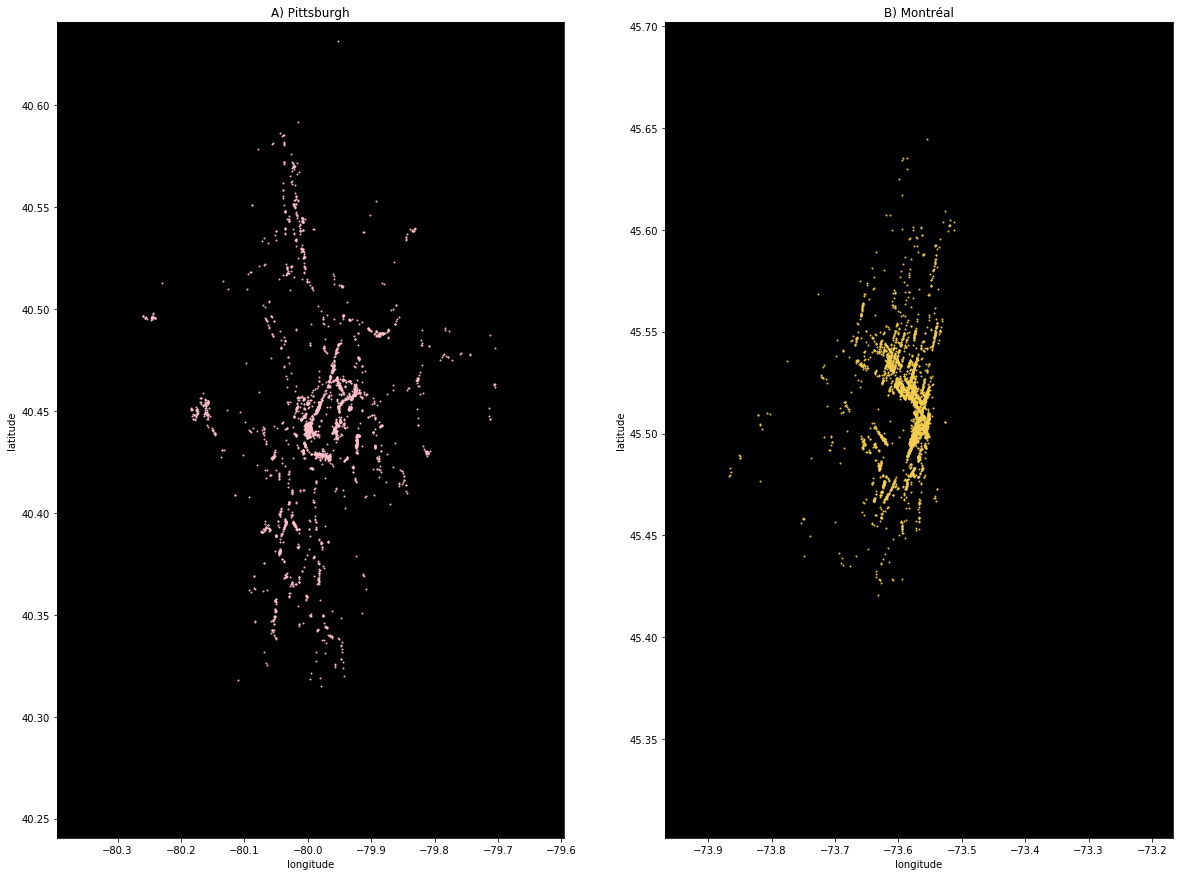

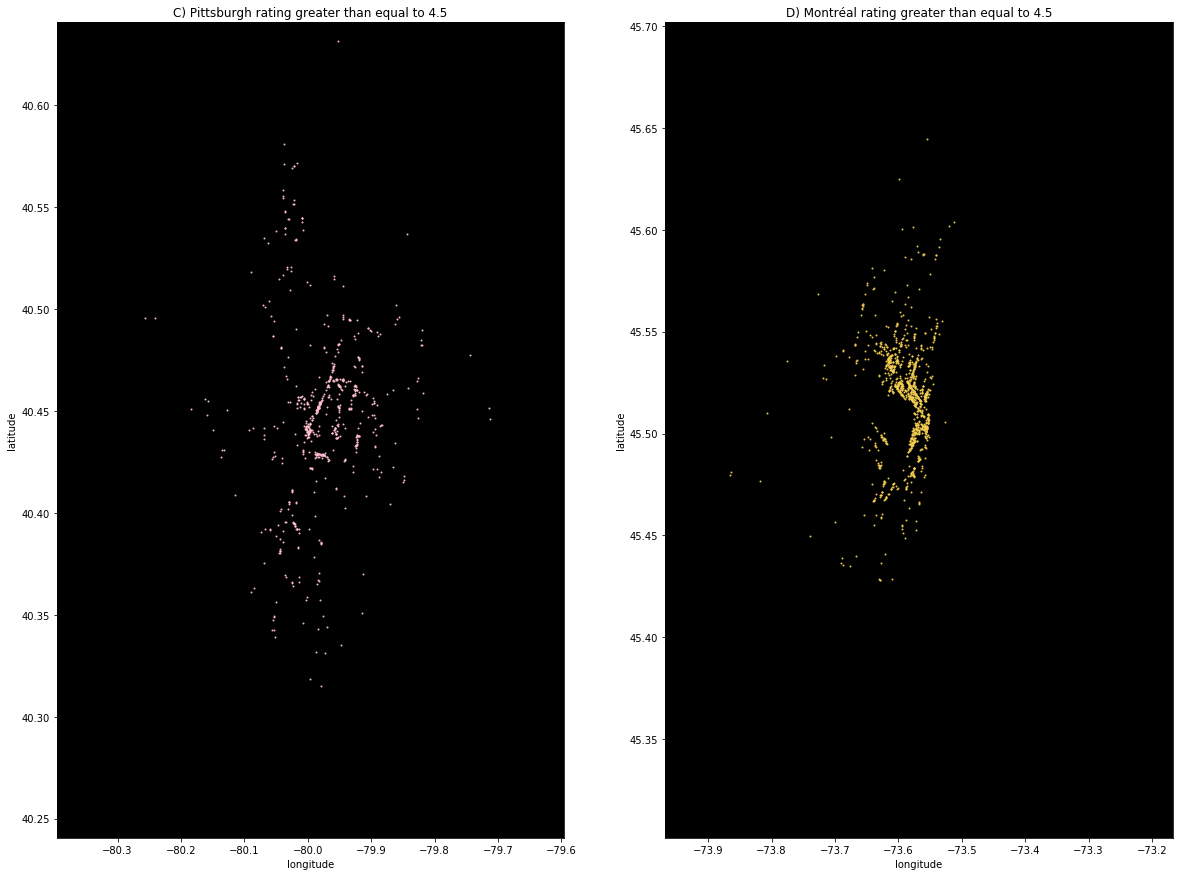

In [8]:
city_business_data = restaurants[['latitude','longitude','stars','review_count','city']]

city_business_data
city_Montreal = city_business_data[(city_business_data["city"] == 'Montréal')]
city_Pittsburgh = city_business_data[(city_business_data["city"] == 'Pittsburgh')]

#finding businesses with ratings greater than equal to 4.5 .
rating= 4.5
city_Montreal_rating = city_Montreal[(city_Montreal["stars"]>= rating)]
city_Pittsburgh_rating = city_Pittsburgh[(city_Pittsburgh["stars"]>=rating)]

#longitude and latitude from google maps. 
lat_pitts = 40.4406
lon_pitts = -79.9959
lat_mont = 45.5017
lon_mont = -73.5673

#x-axis
lon_min_pitts, lon_max_pitts = lon_pitts-0.4,lon_pitts+0.4
#y-axis
lat_min_pitts, lat_max_pitts = lat_pitts-0.2,lat_pitts+0.2

#x-axis
lon_min_mont, lon_max_mont = lon_mont-0.4,lon_mont+0.4
#y-axis
lat_min_mont, lat_max_mont = lat_mont-0.2,lat_mont+0.2

#If We want to view table uncomment the below input
#print (city_Pittsburgh, city_Montreal)

f, (plt1, plt2) = plt.subplots(1, 2, figsize=(20,15))
#plot pheonix
city_Pittsburgh.plot(kind='scatter', x='longitude', y='latitude',
                color='pink', ax=plt1, s=1, alpha=.9, subplots=True)
plt1.set_title("A) Pittsburgh")
plt1.set_facecolor('black')
plt1.set_xlim([lon_min_pitts, lon_max_pitts])
plt1.set_ylim([lat_min_pitts, lat_max_pitts])

#Montreal plot
city_Montreal.plot(kind='scatter', x='longitude', y='latitude',
                color='#F3CD50', ax=plt2, s=1, alpha=.9, subplots=True)
plt2.set_title("B) Montréal")
plt2.set_facecolor('black')
plt2.set_xlim([lon_min_mont, lon_max_mont])
plt2.set_ylim([lat_min_mont, lat_max_mont])

#Ratings greater than 3. 

f, (plt_rating_1, plt_rating_2) = plt.subplots(1, 2, figsize=(20,15))
#plot pheonix
city_Pittsburgh_rating.plot(kind='scatter', x='longitude', y='latitude',
                color='pink', ax=plt_rating_1, s=1, alpha=.9, subplots=True)
plt_rating_1.set_title("C) Pittsburgh rating greater than equal to 4.5")
plt_rating_1.set_facecolor('black')
plt_rating_1.set_xlim([lon_min_pitts, lon_max_pitts])
plt_rating_1.set_ylim([lat_min_pitts, lat_max_pitts])

#Montreal plot
city_Montreal_rating.plot(kind='scatter', x='longitude', y='latitude',
                color='#F3CD50', ax=plt_rating_2, s=1, alpha=.9, subplots=True)
plt_rating_2.set_title("D) Montréal rating greater than equal to 4.5")
plt_rating_2.set_facecolor('black')
plt_rating_2.set_xlim([lon_min_mont, lon_max_mont])
plt_rating_2.set_ylim([lat_min_mont, lat_max_mont])



Using the information presented in the graph depicting the number of reviews received by each city, we considered two cities situated in two different countries to understand the difference in the trends of restaurants and reviews. We considered Montréal (which has 6045 review and is located in Canada) and Pittsburgh (which has 6804 reviews and is located in America) since the number of reviews received were comparable and they fell within the Top 10 cities with the highest reviews. 

Looking at graph A and B, we instantly notice a difference in the two cities. The data points in Montréal (graph B) is more concentrated when compared to that of Pittsburgh (graph A). Even though Montréal is approximately three times in size (size of Montréal 166.6 mi² and size of Pittsburgh 58.35 mi²) the area covered by its restaurants isn’t as spread out. Additionally, you notice that the data points in both the graphs are more concentrated in the center and dwindles as we move away.

Graphs C and D depict restaurants in Montréal and Pittsburgh with ratings greater than equal to 4.5 stars. It is interesting to see how the number of restaurants in Pittsburgh (graph C) reduces far more rapidly than those in Montréal (graph D) when the filter is applied. The surface area covered by restaurants with ratings greater than equal to 4.5 stars is once again more concentrated in Montréal; it isn’t as spread out as Pittsburgh. However, in both the cities the restaurants are still more dense towards the center as compared to the exteriors.

### 2.2 Rating Distributions

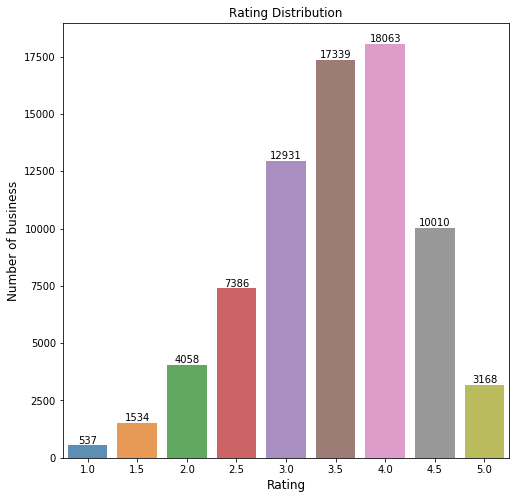

In [12]:
rating_dist = restaurants['stars'].value_counts().sort_index()
plt.figure(figsize=(8,8))
ax = sns.barplot(rating_dist.index, rating_dist.values, alpha=0.8)
plt.title("Rating Distribution")
plt.ylabel('Number of business', fontsize=12)
plt.xlabel('Rating', fontsize=12)

rects = ax.patches
labels = rating_dist.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

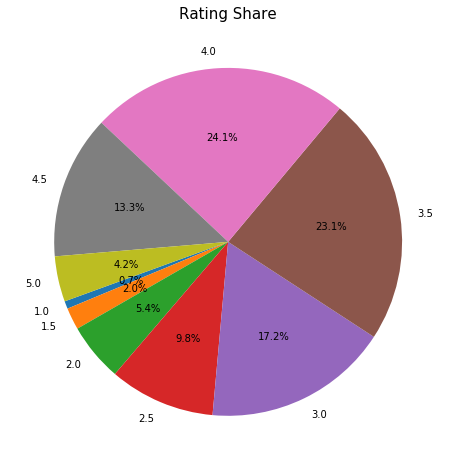

In [13]:
plt.figure(figsize=(8,8))
labels = (np.array(rating_dist.index))
sizes = (np.array((rating_dist / rating_dist.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct= '%1.1f%%', startangle = 200)
plt.title("Rating Share", fontsize=15)
plt.show()

### 2.3 Top Categories, State and City in terms of number of business

The number of categories of business is 825


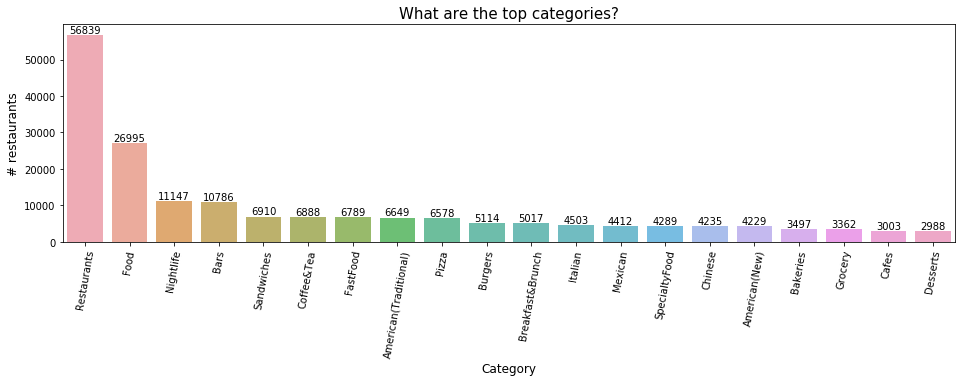

In [14]:
cat_all_res = ','.join(restaurants['categories']).replace(" ", "")
cat_all_res = pd.DataFrame(cat_all_res.split(','), columns=['category'])
cat_all_res_count = cat_all_res.category.value_counts().sort_values(ascending = False)
print(f"The number of categories of business is {len(cat_all_res_count)}")

x = cat_all_res_count.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('Category', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

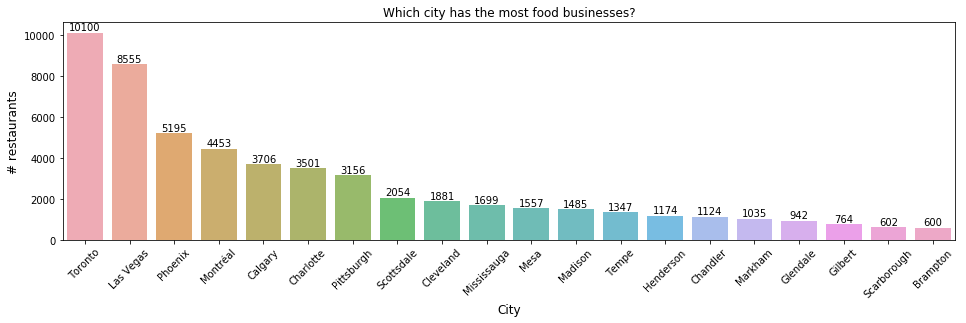

In [9]:
# Location distribution

city_count = restaurants['city'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,4))
ax = sns.barplot(city_count[0:20].index, city_count[0:20].values, alpha=0.8)
plt.title("Which city has the most food businesses?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('City', fontsize=12)

rects = ax.patches
labels = city_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 2.4 A look at the Reviews Dataset

In [14]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,x7mDIiDB3jEiPGPHOmDzyw,msQe1u7Z_XuqjGoqhB0J5g,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,The pizza was okay. Not the best I've had. I p...,0,0,0
1,dDl8zu1vWPdKGihJrwQbpw,msQe1u7Z_XuqjGoqhB0J5g,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,I love this place! My fiance And I go here atl...,0,0,0
2,LZp4UX5zK3e-c5ZGSeo3kA,msQe1u7Z_XuqjGoqhB0J5g,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,Terrible. Dry corn bread. Rib tips were all fa...,3,1,1
3,Er4NBWCmCD4nM8_p1GRdow,msQe1u7Z_XuqjGoqhB0J5g,elqbBhBfElMNSrjFqW3now,2,2011-02-25,Back in 2005-2007 this place was my FAVORITE t...,2,0,0
4,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0


In [28]:
gb = reviews.groupby('business_id').agg({"user_id": pd.Series.nunique})

In [29]:
gb = gb.sort_values(by = 'user_id', ascending=False)

In [30]:
gb = gb.reset_index()

In [56]:
gb.head()

,business_id,user_id
0,4JNXUYY8wbaaDmk3BPzlWw,7968
1,RESDUcs7fIiihp38-d6_6g,7861
2,K7lWdNUhCbcnEvI0NhGewg,6447
3,cYwJA2A6I12KNkm2rtXd5g,5472
4,f4x1YBxkLrZg652xt2KR5g,5382


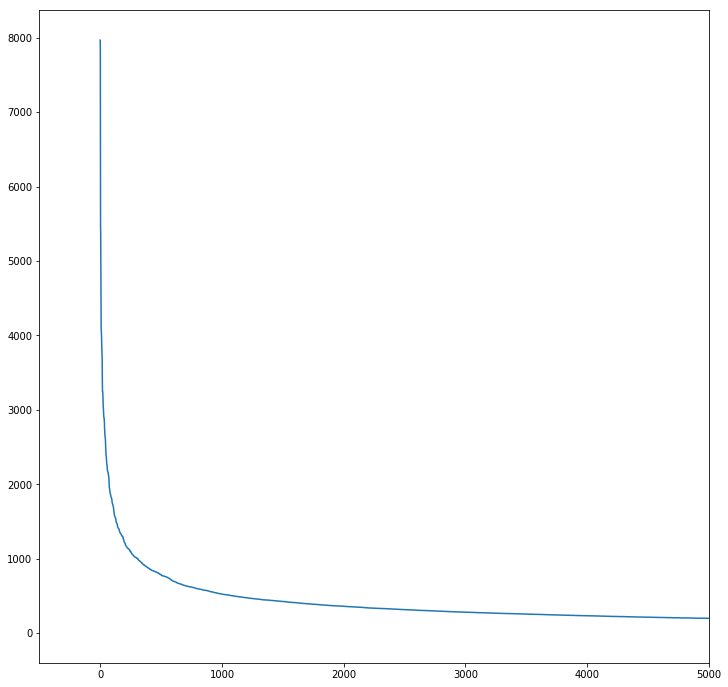

In [55]:
gb['user_id'].plot.line(stacked=True ,figsize=(12,12), xlim = (-500, 5000))